<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="../images/logo.png" width="150" align='right'/></td></tr>     <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2022/2023</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Lab 7 - K-Nearest Neighbours and Combination of Classifiers</center></b></h2>
    <h4><i><b><center>Breast Cancer Dataset</center></b></i></h4></td></tr>
</table>

## 1. K-Nearest Neighbours Classifier

The K-Nearest Neighbours algorithm is perhaps the most simple Machine Learning model. It fits the discriminative models' group and works in an __instance-based__ way.

KNN does not have a training step. All computations take place at classification time, resorting to the concept of __distance__.

<div>
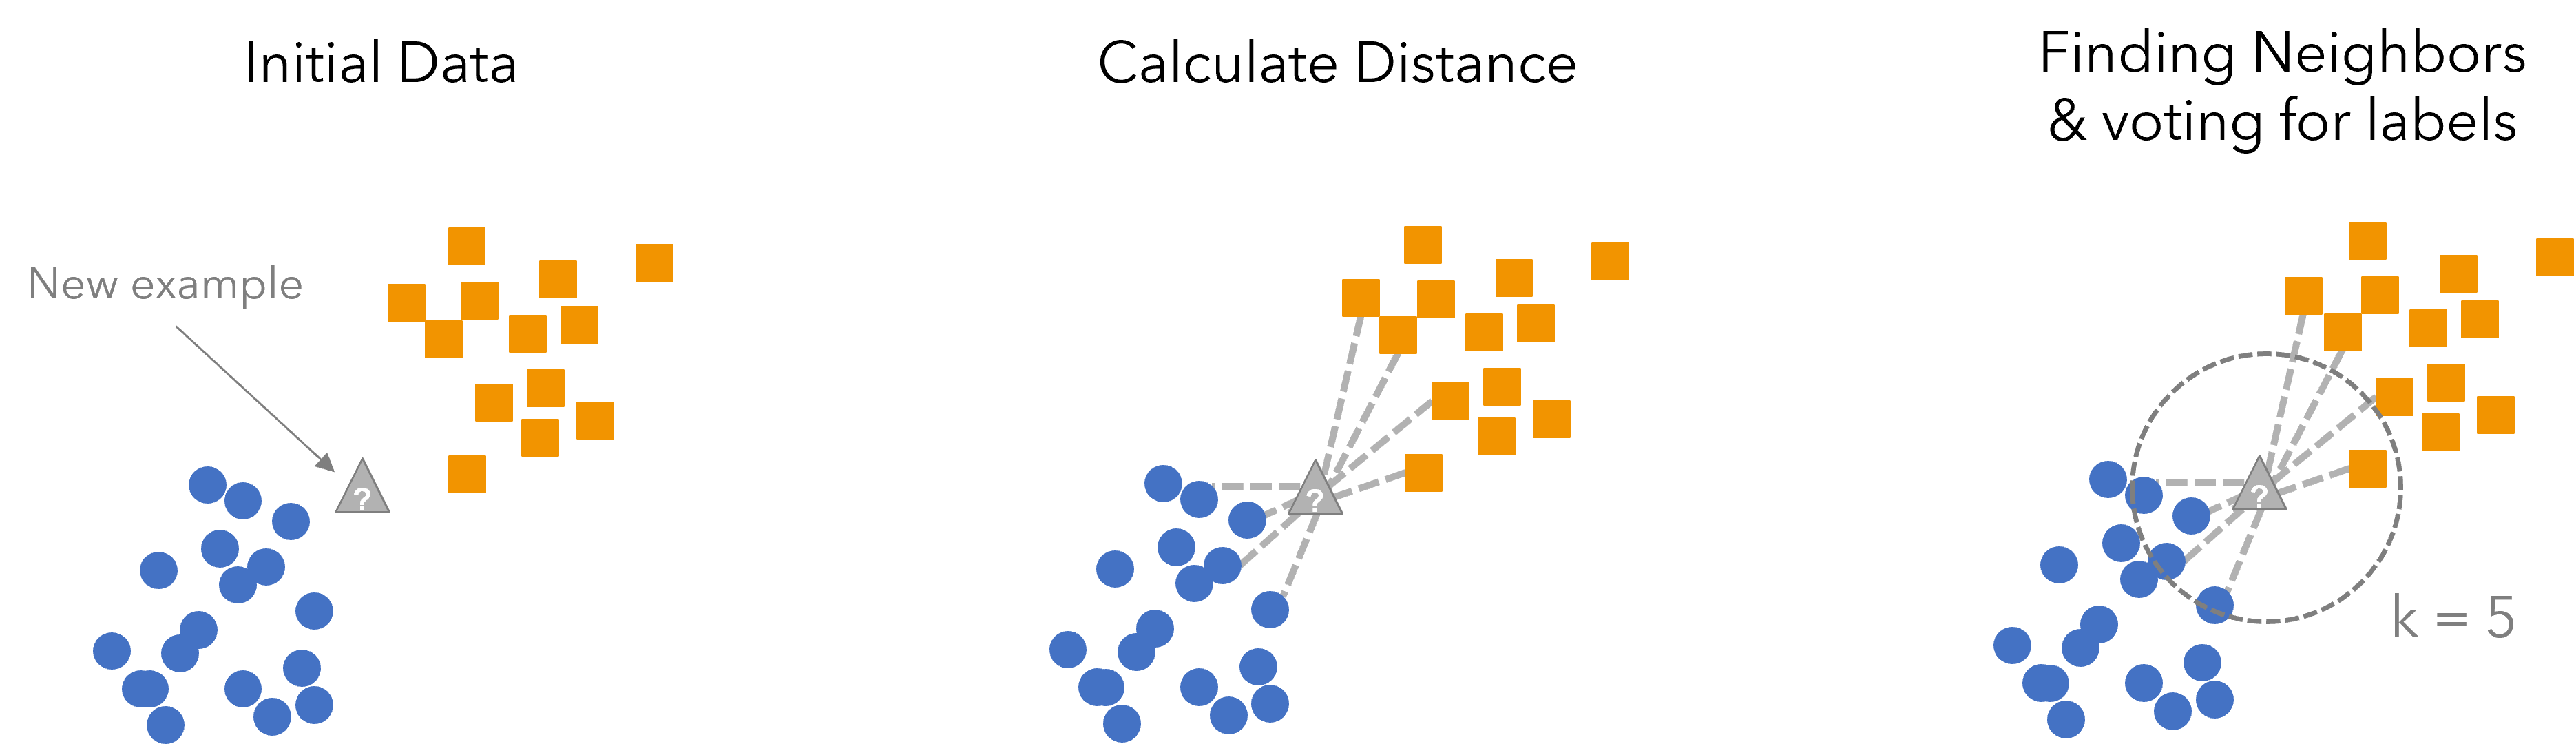
</div>

This image summarizes the inference process of a KNN classifier. When a new test sample arrives, its distances to all samples in the training set are computed. From the K samples with lowest distance, the predicted class is selected using either majority voting or weighted average.

As such, with this algorithm there is no need to build a model, tune several parameters, or make additional assumptions. However, the inference process gets significantly slower as the number of examples and/or independent variables increase.

### 1.1. Implementing a KNN Classifier

##### 1.1.1. Loading the Breast Cancer Data

Let us recover the [Breast Cancer Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data) from UCI Repository.

The following method applies all loading and preprocessing steps, returning the ready-to-use train and test sets:

In [ ]:
from lab6_code import load_process_breast_cancer_dataset

X_train, X_test, y_train, y_test, features_name = load_process_breast_cancer_dataset()

In [ ]:
import pandas as pd
import numpy as np

pd.DataFrame(X_train, columns= features_name).head()

##### 1.1.2. Defining the KNN Classifier

To compute the distance between new test samples and the train set we will resort to the __Euclidean Distance__. The following method computes the distance between two samples, considering all features.

In [ ]:
from scipy.spatial import distance

def euclidean_distance(a, b): 
    return distance.euclidean(a, b) 

In [ ]:
euclidean_distance(X_train[0], X_test[0])

Then, it is necessary to define a decision method based on the K closest training samples. We will use majority voting to select the output class.

In [ ]:
from scipy.stats import mode

def majority_voting(distances, labels, k):
    
    best_distances = np.argsort(distances)[:k]
    
    return mode(labels[best_distances])[0][0]

Finally, we can implement our prediction method, which will receive a test sample and decide the output label.

In [ ]:
def knn_prediction(new_sample, train_data, labels, k):
    
    distances = list()
    
    for train_sample in train_data:
        distances += [euclidean_distance(new_sample, train_sample)]
        
    return majority_voting(distances, labels, k)    

##### 1.1.3. Making Predictions

Let us resort to a 10-Nearest Neighbours approach and verify the result for some sample from the test data.

In [ ]:
K = 10
test_id = 0

output = knn_prediction(X_test[test_id], X_train, y_train, K)

print("Output label for 10-NN: {} (Ground Truth: {})".format(output, y_test[test_id]))

### 1.2. Exercices

__Exercice 1__: What is the performance of the implemented 10-NN classifier in the test set?

Hint: You need to define a method to make predictions for all test samples.

__Exercice 2__: How does the performance varies when changing K to 1 and 5? Discuss the results.

### 1.3. The KNeighborsClassifier

Sklearn includes an implementation of the K-Nearest Neighbours Classifier, trough the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

The sklearn implementation allows to use the common ML pipeline methods, with the additional option to define different hyperparameters, such as the distance measure and the voting mechanism.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")

### 1.4. Exercice

__Exercice 3__: Use the sklearn implementation to compare the results of our implementation for K=10. Then, verify the effect of using different voting methods (through `weights` hyperparameter). Justify the differences.

__Exercice 4__: What is the need for the `.fit` method in such classification method?

## 2. Combination of Classifiers

ML algorithms work on different assumptions and therefore take different conclusions from the data. While some may work better in some subsection of the population, other may attain better performances in other subset of data.

As such, ML tasks often benefit from the combination of different classifiers, resorting to distinct techniques to merge all outputs.

There are different types of classifier combination:

* __Combination of $\hat{y}$__: The output classes are combined through methods such as majority voting or weighted majority.

* __Combination of $p(y|x)$__: The output probabilities are combined resorting to mathematical operations, such as the maximum, the product or the sum of all contributions.

* __Ensemble__: Multiple models are trained often with the same algorithm, in techniques such as Bagging, Random Forest, Boosting or Stacking.

### 2.1. Random Forests

Random Forests are an ensemble ML model with resorts to the combination of multiple weak Decision Trees through majority voting.

<div>
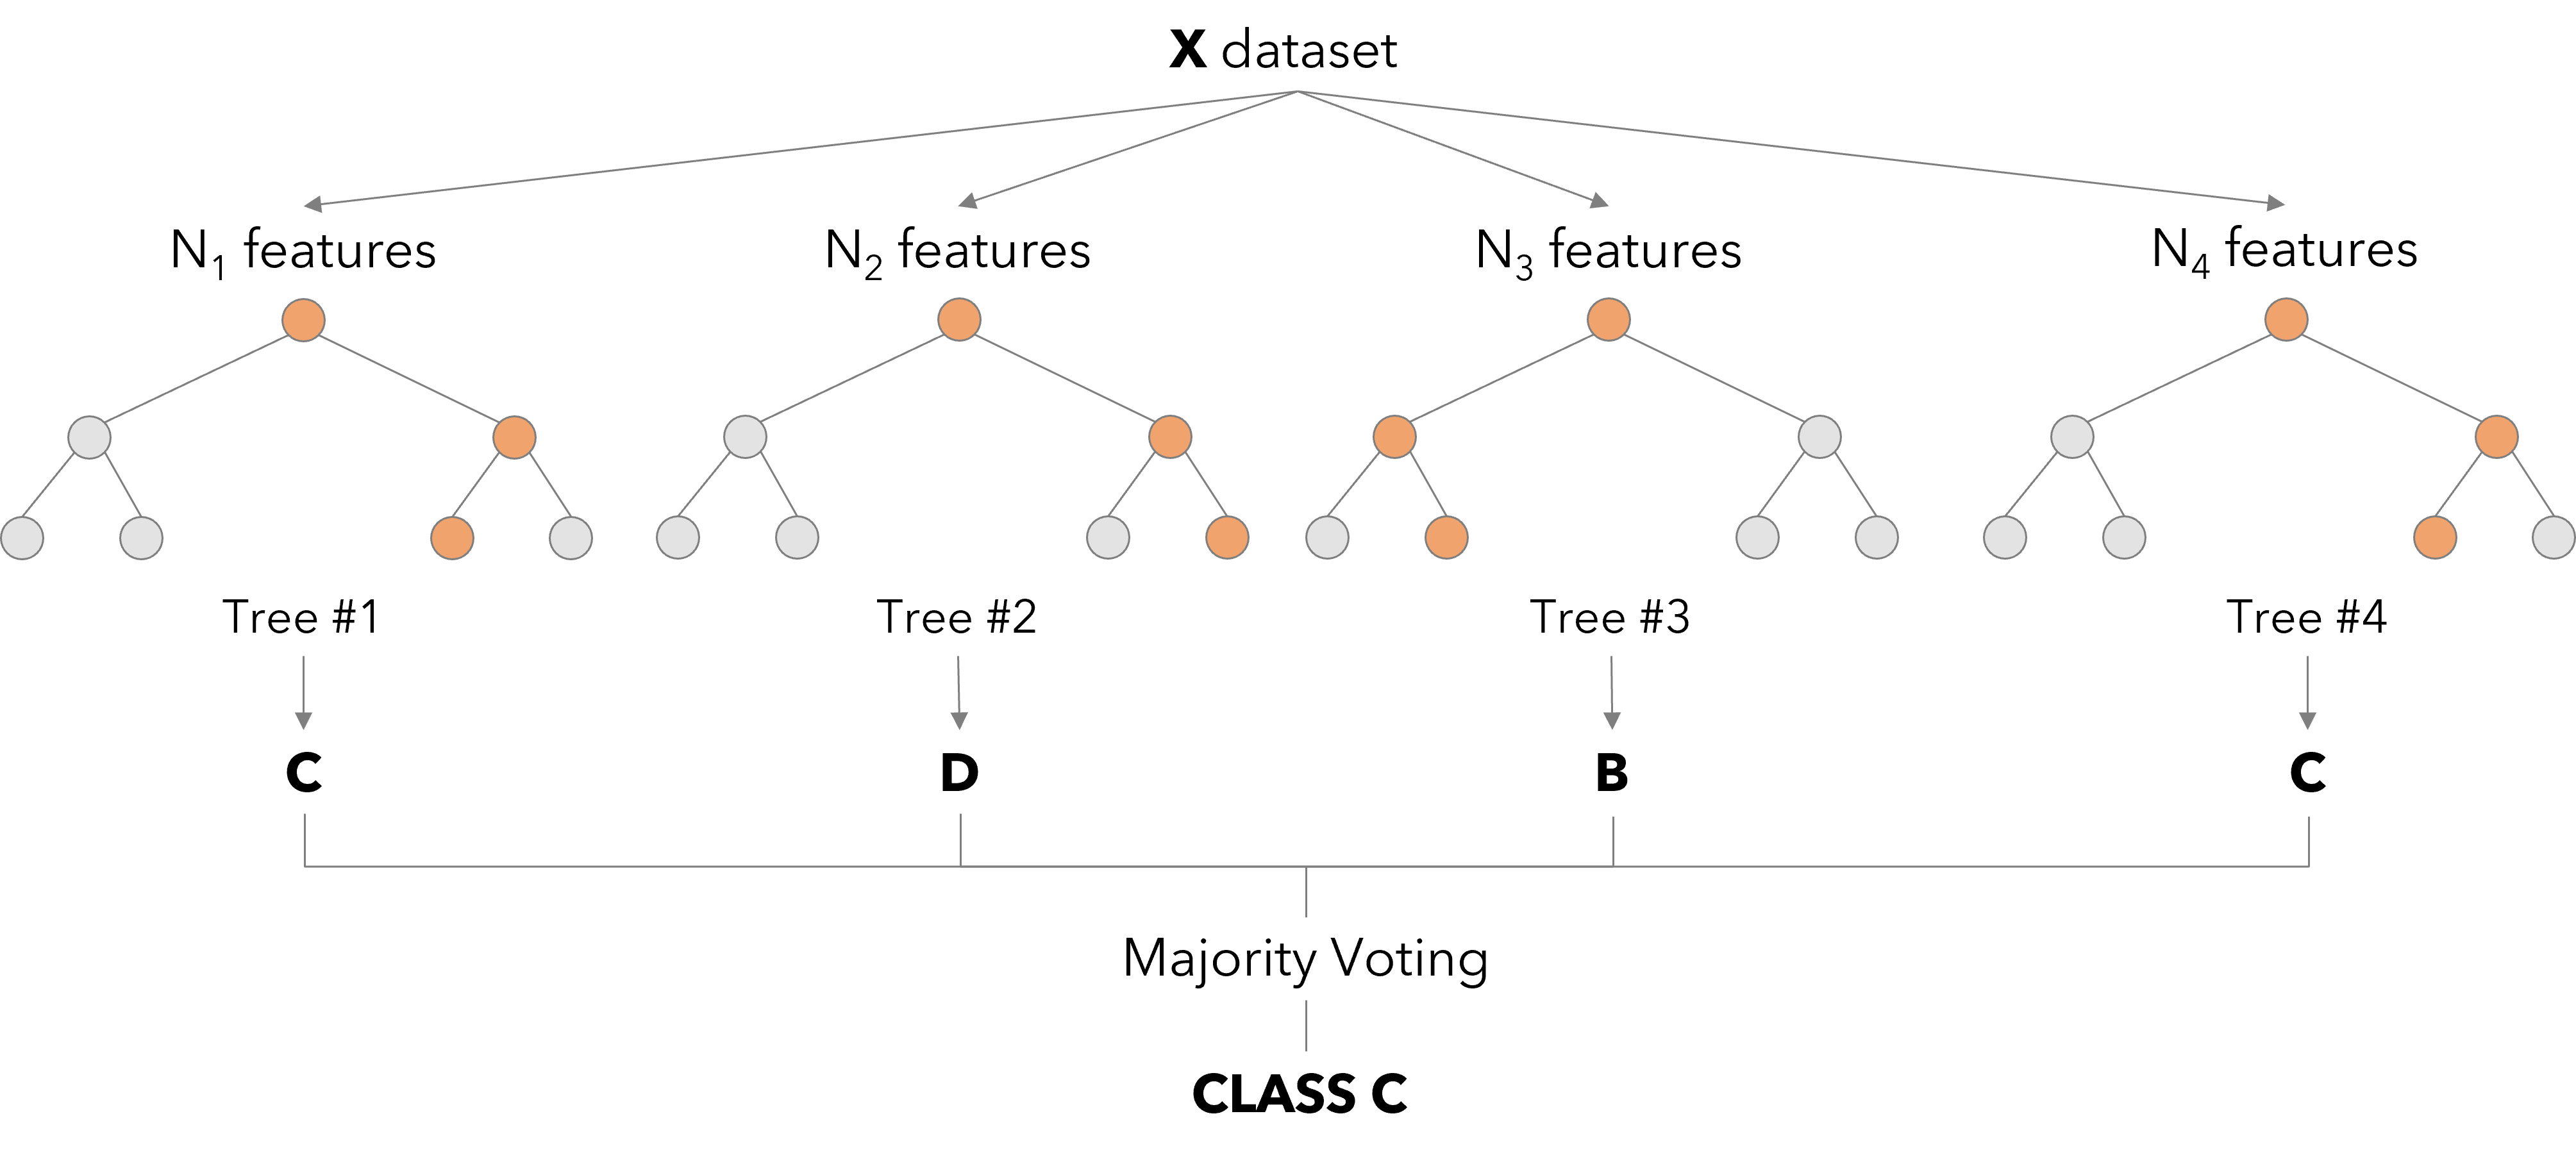
</div>

These weak trees consist on Decision Tree models trained on a random subset of samples, which only contain a subset of features. This often leads to a more stable and generalizable model.

### 2.2. Exercices

__Exercice 5__: Discuss one disadvantage of Random Forests compared to Decision Trees.

__Exercice 6__: Train a Decision Tree classifier on the Breast Cancer dataset. Use 5, 50 and 100 estimators. Compare the results through the appropriate metrics.

__Exercice 7__: Consider the Breast Cancer dataset. Develop a method for the combination of classifiers through majority voting. Train 5 different classifiers from the `sklearn` library and combine the results.


__Exercice 8__: Compare the results of the test set on the Ensemble model, as well as on the individual classifiers. Discuss the results.